In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import re
from scipy import linalg

In [2]:
collectedData = {}
df_grad_cd_list = []
for dir1 in os.listdir("CollectedData"):
    if os.path.isdir(os.path.join("CollectedData", dir1)):
        
        collectedData[dir1] = {}
        for dsn_dir in os.listdir(os.path.join("CollectedData", dir1)):
            if os.path.isdir(os.path.join("CollectedData", dir1, dsn_dir)):
                data = json.load(open(os.path.join("CollectedData", dir1, dsn_dir, "dsn_data.json"), "r"))
                collectedData[dir1][dsn_dir] = data

In [3]:
re_log_line = r"\|\s+\d+(\|\s+-?\d+\.\d+){4}\|\n"

dir_list = []
dfs = []
dv_mat = []
surf_dfs = []
surf_cd_dfs = []

#df_meta = pd.DataFrame(columns=["AOA"])
meta_rows = []

result_rows = []
for dir1 in sorted(collectedData.keys()):
    if dir1.startswith("T006"): # or dir1.startswith("T005"):
        for dsn_dir in sorted(collectedData[dir1].keys()):
            dir_str = f"{dir1} {dsn_dir}"
            print(dir_str)
            field_names = ["config_DSN.cfg", "grad_cd", "surface_adjoint_drag", "surface_flow", "log_direct", "flow.meta"]
            if len(collectedData[dir1][dsn_dir].keys() & set(field_names)) < len(field_names):
                print("skipping", dir_str)
                continue
            if "config_DSN.cfg" in collectedData[dir1][dsn_dir]:
                config_lines = collectedData[dir1][dsn_dir]["config_DSN.cfg"]
                dv_line = [l for l in config_lines if l.startswith("DV_VALUE=")][-1].strip()
                #print(dv_line)
                dvs = [float(x) for x in dv_line[10:].split(", ")]
                #if len(dvs) < 30:
                #    print(dir1, dsn_dir)
                #    continue
                #print(dvs)
                if len(dvs) == 38:
                    dv_mat.append(dvs)
            if "grad_cd" in collectedData[dir1][dsn_dir]:
                df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["grad_cd"])
                df["DIR"] = dir_str
                dfs.append(df)
                dir_list.append(f"{dir1} {dsn_dir}")
            if "surface_adjoint_drag" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_adjoint_drag"])
                surf_df["DIR"] = dir_str
                surf_cd_dfs.append(surf_df)
            if "surface_flow" in collectedData[dir1][dsn_dir]:
                surf_df = pd.DataFrame.from_dict(collectedData[dir1][dsn_dir]["surface_flow"])
                surf_df["DIR"] = dir_str
                surf_dfs.append(surf_df)
            if "log_direct" in collectedData[dir1][dsn_dir]:
                log_lines = collectedData[dir1][dsn_dir]["log_direct"]
                log_lines_iter = [l for l in log_lines if re.match(re_log_line, l)]#[-100:]
                lls = log_lines_iter[-1].split("|")[1:-1]
                iteration = int(lls[0])
                rms_rho = float(lls[1])
                rms_nu = float(lls[2])
                c_L = float(lls[3])
                c_D = float(lls[4])
                #print(dir_str, c_L, c_D)
                result_rows.append((dir_str, c_L, c_D, rms_rho, rms_nu))
            if "flow.meta" in collectedData[dir1][dsn_dir]:
                #print(collectedData[dir1][dsn_dir]["flow.meta"])
                #break
                for l in collectedData[dir1][dsn_dir]["flow.meta"]:
                    if l.startswith("AOA="):
                        meta_rows.append((dir_str, float(l.strip().split()[1])))

#dv_mat = np.asarray(dv_mat)
df_result = pd.DataFrame(columns=["DIR", "c_L", "c_D", "rms_rho", "rms_nu"], data=result_rows)
df_meta =  pd.DataFrame(columns=["DIR", "AOA"], data=meta_rows)
df_result = df_result.merge(df_meta, on="DIR")

T006 DSN_000
T006 DSN_001
T006 DSN_002
T006 DSN_003
T006 DSN_004
T006 DSN_005
T006 DSN_006
T006 DSN_007
T006 DSN_008
T006 DSN_009
T006 DSN_010
T006 DSN_011
T006 DSN_012
T006 DSN_013
T006 DSN_014
T006 DSN_015
T006 DSN_016
T006 DSN_017
T006 DSN_018
T006 DSN_019
T006 DSN_020
T006 DSN_021
T006 DSN_022
T006 DSN_023
T006 DSN_024
T006 DSN_025
T006 DSN_026
T006 DSN_027
T006 DSN_028
T006 DSN_029
T006 DSN_030
T006 DSN_031
T006 DSN_032
T006 DSN_033
T006 DSN_034
T006 DSN_035
T006 DSN_036
T006 DSN_037
T006 DSN_038
T006 DSN_039
T006 DSN_040
T006 DSN_041
T006 DSN_042
T006 DSN_043
T006 DSN_044
T006 DSN_045
T006 DSN_046
T006 DSN_047
T006 DSN_048
T006 DSN_049
T006 DSN_050
T006 DSN_051
T006 DSN_052
T006 DSN_053
T006 DSN_054
T006 DSN_055
T006 DSN_056
T006 DSN_057
T006 DSN_058
T006 DSN_059
T006 DSN_060
T006 DSN_061
T006 DSN_062
T006 DSN_063
T006 DSN_064
T006 DSN_065
T006 DSN_066
T006 DSN_067
T006 DSN_068
T006 DSN_069
T006 DSN_070
T006 DSN_071
T006 DSN_072
T006 DSN_073
T006 DSN_074
T006 DSN_075
T006 DSN_076

T006 DSN_635
T006 DSN_636
T006 DSN_637
T006 DSN_638
T006 DSN_639
T006 DSN_640
T006 DSN_641
T006 DSN_642
T006 DSN_643
T006 DSN_644
T006 DSN_645
T006 DSN_646
T006 DSN_647
T006 DSN_648
T006 DSN_649
T006 DSN_650
T006 DSN_651
T006 DSN_652
T006 DSN_653
T006 DSN_654
T006 DSN_655
T006 DSN_656
T006 DSN_657
T006 DSN_658
T006 DSN_659
T006 DSN_660
T006 DSN_661
T006 DSN_662
T006 DSN_663
T006 DSN_664
T006 DSN_665
T006 DSN_666
T006 DSN_667
T006 DSN_668
T006 DSN_669
T006 DSN_670
T006 DSN_671
T006 DSN_672
T006 DSN_673
T006 DSN_674
T006 DSN_675
T006 DSN_676
T006 DSN_677
T006 DSN_678
T006 DSN_679
T006 DSN_680
T006 DSN_681
T006 DSN_682
T006 DSN_683
T006 DSN_684
T006 DSN_685
T006 DSN_686
T006 DSN_687
T006 DSN_688
T006 DSN_689
T006 DSN_690
T006 DSN_691
T006 DSN_692
T006 DSN_693
T006 DSN_694
T006 DSN_695
T006 DSN_696
T006 DSN_697
T006 DSN_698
T006 DSN_699
T006 DSN_700
T006 DSN_701
T006 DSN_702
T006 DSN_703
T006 DSN_704
T006 DSN_705
T006 DSN_706
T006 DSN_707
T006 DSN_708
T006 DSN_709
T006 DSN_710
T006 DSN_711

In [4]:
import pickle
dir1 = "T006"
dv_list = pickle.load(open(os.path.join("CollectedData", dir1, "dv_list.p"), "rb"))
dv_mat2 = np.asarray(dv_list) #[:len(dir_list),:]
if len(dv_mat):
    dv_mat = np.vstack((np.asarray(dv_mat), dv_mat2))[:len(dir_list),:]
else:
    dv_mat = dv_mat2[:len(dir_list),:]

In [5]:
np.asarray(dv_mat).shape, dv_mat2.shape

((1000, 38), (1000, 38))

In [6]:
df_result

,DIR,c_L,c_D,rms_rho,rms_nu,AOA
0,T006 DSN_000,0.712967,0.060632,-4.977940,-5.366283,5.622905
1,T006 DSN_001,0.724184,0.018179,-6.424451,-8.215098,3.673885
2,T006 DSN_002,0.724241,0.012951,-6.452422,-8.123596,1.245573
3,T006 DSN_003,0.724184,0.018523,-6.395492,-8.374623,2.102441
4,T006 DSN_004,0.724207,0.013087,-6.535674,-8.658059,2.780464
...,...,...,...,...,...,...
995,T006 DSN_995,0.723134,0.030137,-6.175512,-6.857003,2.950256
996,T006 DSN_996,0.724201,0.018668,-6.426329,-8.284552,2.422116
997,T006 DSN_997,0.724063,0.027954,-6.543067,-7.889432,2.725608
998,T006 DSN_998,0.724212,0.022010,-6.407270,-8.054449,2.908295


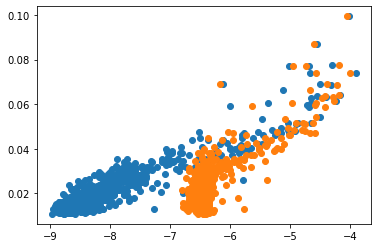

In [7]:
plt.plot(df_result["rms_nu"], df_result["c_D"], "o")
plt.plot(df_result["rms_rho"], df_result["c_D"], "o")

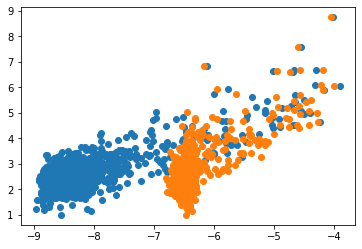

In [8]:
plt.plot(df_result["rms_nu"], df_result["AOA"], "o")
plt.plot(df_result["rms_rho"], df_result["AOA"], "o")

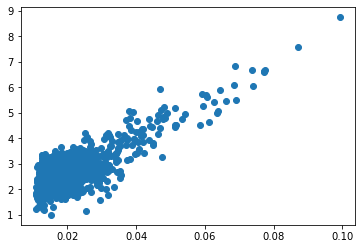

In [9]:
plt.plot(df_result["c_D"], df_result["AOA"], "o")

In [10]:
a = df_result["rms_rho"] < -6
a.sum()

924

In [11]:
c_D = df_result["c_D"].values[a]
c_D.shape

(924,)

In [12]:
df_cd_grad = pd.concat(dfs) #.set_index("DIR") #.sort_values("DIR")
d_CD = np.resize(df_cd_grad["CD_GRAD"].values, ((len(dir_list), 38)))[a]

In [13]:
d_CD.shape

(924, 38)

In [14]:
#np.outer(d_CD[0], d_CD[0])[0] - d_CD[0,0]*d_CD[0]

In [15]:
C = np.outer(d_CD, d_CD.T) / d_CD.shape[0]

MemoryError: Unable to allocate 9.19 GiB for an array with shape (35112, 35112) and data type float64

In [37]:
C = np.zeros((38,38))
for i in range(d_CD.shape[0]):
    C += np.outer(d_CD[i], d_CD[i])
C = C / d_CD.shape[0]

In [38]:
d_CD.shape[0]

924

In [39]:
C.shape

(38, 38)

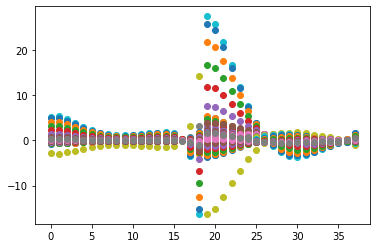

In [19]:
for i in range(38):
    plt.plot(C[i], 'o')

In [20]:
l, W = linalg.eig(C)
l = l.astype("double")

<ipython-input-20-e46ca48f6ef3>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  l = l.astype("double")


In [21]:
l, l**2, np.sqrt(l)

(array([1.05124173e+02, 8.35126770e+00, 5.40810283e+00, 1.38478176e+00,
        8.42755820e-01, 4.56642713e-01, 2.56353998e-01, 1.46955548e-01,
        8.66549036e-02, 4.24823724e-02, 1.06154621e-02, 7.45814961e-03,
        1.81546505e-03, 1.45260839e-03, 5.43181370e-04, 3.36978152e-04,
        1.22713977e-04, 4.77765428e-05, 2.33688471e-05, 4.77487144e-06,
        3.84064692e-06, 3.93886201e-07, 3.16198352e-07, 2.30845986e-08,
        1.82114790e-08, 1.53895481e-09, 8.73894806e-10, 8.71512427e-11,
        3.17042147e-11, 5.80461475e-12, 3.67202107e-12, 2.59619506e-12,
        1.89747323e-12, 5.79189052e-13, 2.22080176e-13, 6.08298558e-14,
        7.39642937e-14, 1.34050388e-13]),
 array([1.10510918e+04, 6.97436723e+01, 2.92475763e+01, 1.91762052e+00,
        7.10237372e-01, 2.08522567e-01, 6.57173722e-02, 2.15959331e-02,
        7.50907231e-03, 1.80475197e-03, 1.12688036e-04, 5.56239956e-05,
        3.29591333e-06, 2.11007113e-06, 2.95046001e-07, 1.13554275e-07,
        1.50587201e-08

In [22]:
W[0], W[:,0]

(array([-9.54660363e-02, -8.74683184e-03,  6.99081113e-02, -3.71729990e-01,
         2.32896180e-01, -2.49632750e-01,  9.03199219e-02,  3.12741459e-02,
         1.36055531e-01, -1.00899754e-01, -6.85779086e-02,  1.08293411e-01,
         2.54533495e-01,  1.29369873e-01,  5.66402443e-01, -5.37604932e-02,
         2.62876297e-01,  2.24127060e-04, -2.95208489e-01, -2.37776388e-01,
         1.60063491e-02,  1.66379818e-01, -8.62931968e-03,  1.40286171e-01,
        -1.67213921e-02, -8.80261953e-02, -1.95017001e-02,  4.34337312e-02,
        -4.96181564e-04, -7.45831477e-03, -2.48957395e-02, -9.78984510e-03,
        -2.36927605e-03,  1.19120004e-02,  1.11366527e-04, -8.61850940e-04,
        -9.54870915e-04, -9.67372046e-05]),
 array([-0.09546604, -0.09707783, -0.0865084 , -0.07157038, -0.05614313,
        -0.04251905, -0.03197743, -0.0250159 , -0.02152232, -0.02096126,
        -0.02257665, -0.02556765, -0.02916024, -0.03245446, -0.03381973,
        -0.02921547, -0.00732753,  0.06633861,  0.309

In [42]:
pca = PCA(whiten=False)

In [43]:
pca.fit(d_CD/np.sqrt(d_CD.shape[1]))

PCA()

In [44]:
pca.score(d_CD/d_CD.shape[0])

227.91581541237593

In [45]:
np.dot(pca.components_[0], W[:,1])

0.019889569155081013

In [46]:
np.dot(pca.components_[0], pca.components_[0])

0.9999999999999993

In [28]:
np.dot(W[0], W[1])

-4.2711670608652774e-07

In [29]:
np.dot(W[:,0], W[:,0])

1.0

In [47]:
np.dot(pca.components_[0], W[:,1])

0.019889569155081013

In [31]:
W.shape

(38, 38)

In [32]:
r = 5

In [48]:
Y = pca.transform(dv_mat[a])[:,:r]
Y.shape

(924, 5)

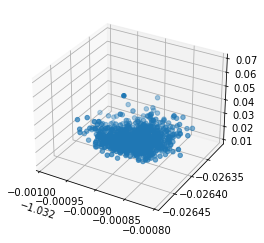

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Y[:,0], Y[:,1], c_D)

In [ ]:
Y[:,0].mean(), Y[:,0].var()

In [50]:
Y2 = np.dot(W[:r,:], dv_mat[a].T).T
Y2.shape

(924, 5)

In [ ]:
Y[0], Y2[0]

In [35]:
import scipy

In [36]:
from scipy import linalg

In [51]:
l, W = scipy.linalg.eig(C)

In [52]:
np.outer(d_CD[0], d_CD[0]).shape

C2 = np.zeros_like(C)
for i in range(d_CD.shape[0]):
    C2 += np.outer(d_CD[i], d_CD[i].T)

C2 = C2 / d_CD.shape[0]

In [53]:
d_CD[0]

array([ 0.621198 ,  0.638195 ,  0.582739 ,  0.503014 ,  0.422043 ,
        0.352958 ,  0.302833 ,  0.274264 ,  0.266471 ,  0.27644  ,
        0.300117 ,  0.333451 ,  0.372772 ,  0.413599 ,  0.445624 ,
        0.437262 ,  0.287186 , -0.331585 , -2.27885  ,  6.62241  ,
        5.90301  ,  4.6314   ,  3.24922  ,  1.94075  ,  0.801395 ,
       -0.120068 , -0.805092 , -1.25682  , -1.49534  , -1.55572  ,
       -1.48658  , -1.34341  , -1.16791  , -0.951871 , -0.615335 ,
       -0.0946435,  0.303852 , -0.0358609])

In [54]:
i = 0
np.outer(d_CD[i], d_CD[i].T)#.shape

array([[ 0.38588696,  0.39644546,  0.3619963 , ..., -0.05879235,
         0.18875225, -0.02227672],
       [ 0.39644546,  0.40729286,  0.37190112, ..., -0.06040101,
         0.19391683, -0.02288625],
       [ 0.3619963 ,  0.37190112,  0.33958474, ..., -0.05515246,
         0.17706641, -0.02089755],
       ...,
       [-0.05879235, -0.06040101, -0.05515246, ...,  0.00895739,
        -0.02875762,  0.003394  ],
       [ 0.18875225,  0.19391683,  0.17706641, ..., -0.02875762,
         0.09232604, -0.01089641],
       [-0.02227672, -0.02288625, -0.02089755, ...,  0.003394  ,
        -0.01089641,  0.001286  ]])

In [ ]:
C[:3,:3], C2[:3,:3]

In [55]:
i = 0
C2[0,0], d_CD[:,0]*d_CD[:,0].T / d_CD.shape[0], np.multiply(d_CD[i].T, d_CD[i])

(1.255404486526879,
 array([4.17626575e-04, 1.14775891e-03, 1.49105629e-03, 7.30836347e-04,
        8.38308585e-04, 1.05013153e-03, 1.33108805e-03, 6.98469354e-04,
        2.16810482e-03, 1.31364610e-03, 5.25844260e-04, 8.61536902e-04,
        8.17063156e-04, 1.26100555e-03, 1.13227502e-03, 8.06865991e-04,
        8.42374974e-04, 8.69529345e-04, 8.20962749e-04, 1.44837870e-03,
        1.01472810e-03, 9.28162678e-04, 1.79734598e-03, 1.29847578e-03,
        6.35418617e-04, 7.27560094e-04, 1.11296377e-03, 1.14633276e-03,
        7.45293314e-04, 7.75591886e-04, 1.23421040e-03, 1.36201575e-03,
        1.06155016e-03, 9.82390424e-04, 6.42627026e-04, 9.30017766e-04,
        8.20250300e-04, 1.49034500e-03, 1.09325293e-03, 1.28155571e-03,
        3.18433193e-05, 6.11810615e-04, 1.07116921e-03, 1.18900366e-03,
        1.10382944e-03, 9.26123218e-04, 1.32902444e-03, 1.42235486e-03,
        1.51109249e-03, 8.41932000e-04, 1.69415730e-03, 5.96047653e-04,
        1.12986309e-03, 1.13768353e-03, 1.33

In [56]:
l

array([1.05124173e+02+0.j, 8.35126770e+00+0.j, 5.40810283e+00+0.j,
       1.38478176e+00+0.j, 8.42755820e-01+0.j, 4.56642713e-01+0.j,
       2.56353998e-01+0.j, 1.46955548e-01+0.j, 8.66549036e-02+0.j,
       4.24823724e-02+0.j, 1.06154621e-02+0.j, 7.45814961e-03+0.j,
       1.81546505e-03+0.j, 1.45260839e-03+0.j, 5.43181370e-04+0.j,
       3.36978152e-04+0.j, 1.22713977e-04+0.j, 4.77765428e-05+0.j,
       2.33688471e-05+0.j, 4.77487144e-06+0.j, 3.84064692e-06+0.j,
       3.93886201e-07+0.j, 3.16198352e-07+0.j, 2.30845986e-08+0.j,
       1.82114790e-08+0.j, 1.53895481e-09+0.j, 8.73894806e-10+0.j,
       8.71512427e-11+0.j, 3.17042147e-11+0.j, 5.80461475e-12+0.j,
       3.67202107e-12+0.j, 2.59619506e-12+0.j, 1.89747323e-12+0.j,
       5.79189052e-13+0.j, 2.22080176e-13+0.j, 6.08298558e-14+0.j,
       7.39642937e-14+0.j, 1.34050388e-13+0.j])

In [57]:
import matplotlib.pyplot as plt

C:\Users\Nils\Anaconda3\envs\MA\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Eigenmodes')

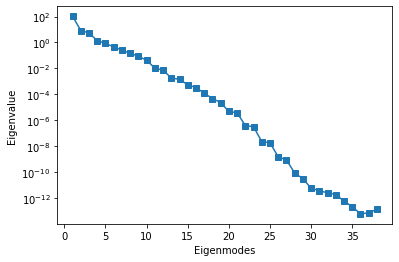

In [58]:
plt.semilogy(range(1,39), l, "-s")
plt.gca().set_ylabel("Eigenvalue")
plt.gca().set_xlabel("Eigenmodes")

C:\Users\Nils\Anaconda3\envs\MA\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Cum. Fraction of Total EV')

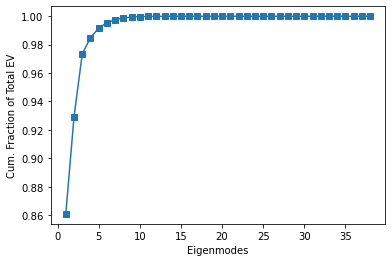

In [59]:
plt.plot(range(1,39), l.cumsum() / l.sum(), "-s")
plt.gca().set_xlabel("Eigenmodes")
plt.gca().set_ylabel("Cum. Fraction of Total EV")

In [60]:
l.cumsum() / float(l.sum())

<ipython-input-60-ddf29ef2c2f3>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  l.cumsum() / float(l.sum())


array([0.86080854+0.j, 0.92919283+0.j, 0.97347704+0.j, 0.98481632+0.j,
       0.99171722+0.j, 0.99545644+0.j, 0.99755559+0.j, 0.99875893+0.j,
       0.99946851+0.j, 0.99981637+0.j, 0.9999033 +0.j, 0.99996437+0.j,
       0.99997923+0.j, 0.99999113+0.j, 0.99999558+0.j, 0.99999834+0.j,
       0.99999934+0.j, 0.99999973+0.j, 0.99999992+0.j, 0.99999996+0.j,
       0.99999999+0.j, 1.        +0.j, 1.        +0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j])

In [61]:
l

array([1.05124173e+02+0.j, 8.35126770e+00+0.j, 5.40810283e+00+0.j,
       1.38478176e+00+0.j, 8.42755820e-01+0.j, 4.56642713e-01+0.j,
       2.56353998e-01+0.j, 1.46955548e-01+0.j, 8.66549036e-02+0.j,
       4.24823724e-02+0.j, 1.06154621e-02+0.j, 7.45814961e-03+0.j,
       1.81546505e-03+0.j, 1.45260839e-03+0.j, 5.43181370e-04+0.j,
       3.36978152e-04+0.j, 1.22713977e-04+0.j, 4.77765428e-05+0.j,
       2.33688471e-05+0.j, 4.77487144e-06+0.j, 3.84064692e-06+0.j,
       3.93886201e-07+0.j, 3.16198352e-07+0.j, 2.30845986e-08+0.j,
       1.82114790e-08+0.j, 1.53895481e-09+0.j, 8.73894806e-10+0.j,
       8.71512427e-11+0.j, 3.17042147e-11+0.j, 5.80461475e-12+0.j,
       3.67202107e-12+0.j, 2.59619506e-12+0.j, 1.89747323e-12+0.j,
       5.79189052e-13+0.j, 2.22080176e-13+0.j, 6.08298558e-14+0.j,
       7.39642937e-14+0.j, 1.34050388e-13+0.j])

In [62]:
r = 5

In [63]:
#U = np.zeros_like(W)
U = W[:r,:].copy()
l1 = l[:r]

#V = np.zeros_like(W)
V = W[r:,:].copy()
l2 = l[r:]

In [64]:
#U = np.zeros_like(W)
U2 = W[:,:r].copy()
l1 = l[:r]

#V = np.zeros_like(W)
V2 = W[:,r:].copy()
l2 = l[r:]

In [65]:
U - U2.T

array([[ 0.        ,  0.088331  ,  0.15641652, -0.30015961,  0.28903931,
        -0.2071137 ,  0.12229735,  0.05629004,  0.15757785, -0.07993849,
        -0.04600126,  0.13386106,  0.28369374,  0.16182433,  0.60022218,
        -0.02454502,  0.27020383, -0.06611448, -0.60450076,  0.26972775,
         0.49740577,  0.57333812,  0.30936303,  0.36955346,  0.13189659,
        -0.00795833,  0.0057165 ,  0.02762049, -0.04415984, -0.06673386,
        -0.08875088, -0.06903496, -0.05076118, -0.02324212, -0.02249988,
        -0.01117666,  0.00534157,  0.03047295],
       [-0.088331  ,  0.        ,  0.06314165, -0.34975521,  0.21976835,
        -0.24245322,  0.07643754,  0.00851276,  0.1599571 , -0.09790905,
        -0.03591679,  0.05207423,  0.0956579 ,  0.04477123,  0.02305554,
        -0.01660814, -0.1542289 , -0.05379809,  0.09355013,  0.48707635,
         0.03106422, -0.39028442, -0.12133934, -0.61992161, -0.25015531,
        -0.02088723, -0.31526929, -0.62612586, -0.37920397, -0.27527331,
   

In [66]:
from sklearn.decomposition import PCA

In [67]:
d_CD.shape

(924, 38)

In [68]:
pca = PCA(n_components=10, svd_solver="full")
pca.fit(d_CD/ np.sqrt(d_CD.shape[0]))

PCA(n_components=10, svd_solver='full')

In [69]:
pca.fit(d_CD)

PCA(n_components=10, svd_solver='full')

In [70]:
d_CD.shape

(924, 38)

In [71]:
print(pca.explained_variance_ratio_)

[8.16023171e-01 1.08578766e-01 4.71720458e-02 1.28024264e-02
 6.20562130e-03 3.98863739e-03 2.22168963e-03 1.42294941e-03
 7.76794791e-04 5.27661980e-04]


In [72]:
l

array([1.05124173e+02+0.j, 8.35126770e+00+0.j, 5.40810283e+00+0.j,
       1.38478176e+00+0.j, 8.42755820e-01+0.j, 4.56642713e-01+0.j,
       2.56353998e-01+0.j, 1.46955548e-01+0.j, 8.66549036e-02+0.j,
       4.24823724e-02+0.j, 1.06154621e-02+0.j, 7.45814961e-03+0.j,
       1.81546505e-03+0.j, 1.45260839e-03+0.j, 5.43181370e-04+0.j,
       3.36978152e-04+0.j, 1.22713977e-04+0.j, 4.77765428e-05+0.j,
       2.33688471e-05+0.j, 4.77487144e-06+0.j, 3.84064692e-06+0.j,
       3.93886201e-07+0.j, 3.16198352e-07+0.j, 2.30845986e-08+0.j,
       1.82114790e-08+0.j, 1.53895481e-09+0.j, 8.73894806e-10+0.j,
       8.71512427e-11+0.j, 3.17042147e-11+0.j, 5.80461475e-12+0.j,
       3.67202107e-12+0.j, 2.59619506e-12+0.j, 1.89747323e-12+0.j,
       5.79189052e-13+0.j, 2.22080176e-13+0.j, 6.08298558e-14+0.j,
       7.39642937e-14+0.j, 1.34050388e-13+0.j])

In [73]:
pca.singular_values_

array([240.42070632,  87.69868351,  57.80467705,  30.11388361,
        20.96588783,  16.80865261,  12.54475884,  10.03957556,
         7.41777705,   6.11362118])

In [74]:
np.cumsum(pca.singular_values_**2) / np. sum(pca.singular_values_**2)

array([0.81625191, 0.92486112, 0.97204639, 0.9848524 , 0.99105976,
       0.99504952, 0.99727183, 0.99869518, 0.99947219, 1.        ])

In [75]:
pca.explained_variance_ratio_.cumsum()

array([0.81602317, 0.92460194, 0.97177398, 0.98457641, 0.99078203,
       0.99477067, 0.99699236, 0.99841531, 0.9991921 , 0.99971976])

In [76]:
x = dv_mat[0]
#x = d_CD[0]
x.shape

y = pca.transform(x.reshape(1,-1))
y

array([[-6.36720642, -0.16277388, -1.45569942, -0.45032519,  0.3430642 ,
         0.71698878, -0.65867457, -0.7229953 ,  0.90841249, -0.35887877]])

In [77]:
z = pca.inverse_transform(y) #/ np.sqrt(400)
z, x, np.linalg.norm(z-x)

(array([[ 0.05240615,  0.02063493, -0.00797237, -0.02946281, -0.04333547,
         -0.05024895, -0.0513165 , -0.04777364, -0.04083032, -0.03162984,
         -0.02129481, -0.0109523 , -0.00161594,  0.00627119,  0.01381889,
          0.02488246,  0.04295032,  0.037659  , -0.01959013,  0.04768365,
         -0.03411703, -0.03148372, -0.0065446 ,  0.01512331,  0.02398808,
          0.01909608,  0.00463346, -0.01200046, -0.0220866 , -0.01861658,
         -0.00098007,  0.02045247,  0.02580753,  0.00183985, -0.03037922,
         -0.01936688,  0.0212543 , -0.00596862]]),
 array([-3.05686990e-05,  1.41461487e-06, -2.03587915e-05, -2.83451664e-05,
        -1.78182272e-05, -7.12713563e-06,  1.33505819e-05, -4.87592006e-05,
         4.08134329e-05,  3.10090400e-05, -4.37217568e-05,  2.87667863e-05,
        -3.01127784e-05, -2.91023425e-05, -1.05557410e-05,  1.21733547e-06,
         3.25002366e-05, -1.51975928e-05,  2.07184912e-05, -4.55952468e-05,
        -4.00769204e-05,  4.53083740e-05,  3.951932

In [78]:
fig, axes = plt.subplots(3, 3, figsize=(16,18))

#for k, ax in enumerate(axes.flat):

for i,n in enumerate([1,2,3,5,7,10,15,24,38]):
    pca = PCA(n_components=n)
    pca.fit(d_CD/ np.sqrt(d_CD.shape[0]))
    x = dv_mat[0]
    y = pca.transform(x.reshape(1,-1))
    z = pca.inverse_transform(y) #/ np.sqrt(400)
    print(n, np.linalg.norm(z-x))
    
    Y = pca.transform(d_CD)
    Z = 
    
    axes[i].scatter()

SyntaxError: invalid syntax (<ipython-input-78-2cf473a21f79>, line 14)

In [ ]:
d_CD.shape

In [ ]:
d_CD.var(axis=0)

In [ ]:
C3 = np.cov(d_CD.T)

In [ ]:
C3, C, pca.components_#, C2

In [ ]:
pca.components_[0]

In [ ]:
d_CD.mean()

In [ ]:
x = np.array([[0, 2], [1, 1], [2, 0]])

In [ ]:
x.shape

In [ ]:
np.cov(x)

In [ ]:
np.outer(x.T, x)

In [ ]:
C2 = np.zeros((2,2))
for i in range(x.shape[0]):
    C2 += np.outer(x[i].T, x[i])

C2 = C2 / x.shape[0]
C2

In [ ]:
np.outer(x[0], x[0]), np.outer(x[1], x[1]), np.outer(x[2], x[2]), 

In [ ]:
l,W = np.linalg.eig(C)

In [ ]:
l2, W2 = linalg.eig(C)


In [ ]:
W- W2

In [ ]:
W.T * W * d_CD.T

In [ ]:
np.dot(W, d_CD.T).shape

In [ ]:
d_CD.T

In [ ]:
np.dot(W[:10].T, np.dot(W[:10], d_CD.T))

In [ ]:
W.T @ W - np.eye(38,38)

In [ ]:
r = 1
W2[:r].T @ W2[:r], np.linalg.norm(W2[:r].T @ W2[:r] - np.eye(38,38))

In [ ]:
U = pca.components_[:3]

In [ ]:
W

In [ ]:
pca.components_

In [ ]:
pca.singular_values_ **2

In [ ]:
l

In [ ]:
pca = PCA(n_components=38, svd_solver="full")
pca.fit(d_CD/ np.sqrt(d_CD.shape[0]))

In [ ]:
plt.semilogy(l, "o")
#plt.semilogy(pca.singular_values_)
plt.semilogy(pca.singular_values_**2)


In [ ]:
l, pca.singular_values_**2

In [ ]:
pca.transform(dv_mat[:1])

In [ ]:
W[:,:3].T @ dv_mat[:1].T, W[:3] @ dv_mat[1]

In [ ]:
W[:,:3].T.shape, dv_mat[:1].shape

In [ ]:
l*C, 

In [ ]:
for i in range(10):
    for j in range(10):
        #print(i,j, W[:,i] @ pca.components_[j])
        print(i,j, W[:,i] @ W[:,j])

In [ ]:
(pca.components_ * pca.singular_values_).shape

In [ ]:
U[0]

In [ ]:
l

In [ ]:
pca.n_samples_

In [ ]:
x = np.zeros(38)
x

In [ ]:
y = np.dot(U, x)
y, y.shape

In [ ]:
U.shape, V.shape, dv_mat.shape, np.sum(l)

In [ ]:
np.dot(U,dv_mat.T).shape
Y = np.dot(dv_mat, U.T)

In [ ]:
Y = pca.transform(dv_mat[a])

In [ ]:
Y.shape

In [ ]:
Y = np.dot(dv_mat, U2) #* np.sum(l).astype("double")
#Y = np.dot(dv_mat, U.T) #* np.sum(l).astype("double")
U
Y.shape, df_result["c_D"].shape

In [ ]:
plt.plot(df_result["rms_nu"], df_result["c_D"], "o")
plt.plot(df_result["rms_rho"], df_result["c_D"], "o")

In [ ]:
plt.plot(df_result["rms_nu"], df_result["AOA"], "o")
plt.plot(df_result["rms_rho"], df_result["AOA"], "o")

In [ ]:
a = df_result["rms_rho"] < -6

In [ ]:
Y[a].shape

In [ ]:
#fig, axes = plt.subplots(1, 1, figsize=(16,40))

plt.plot(U[:r].T * l[:r])

In [ ]:
np.dot(dv_mat[0], U.T)

In [ ]:
np.dot(dv_mat[0], U[0]), Y[0,0]

In [ ]:
c_D = df_result["c_D"].values

In [ ]:
c_D

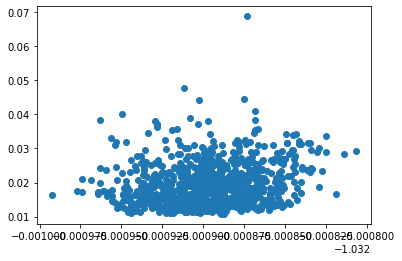

In [79]:
#plt.scatter(Y[:,0], Y[:,1], c=df_result["c_D"][a])
#plt.scatter(Y[:,0], df_result["c_D"]), plt.scatter(Y[:,1], df_result["c_D"]), plt.scatter(Y[:,2], df_result["c_D"])
#plt.scatter(Y[:,:], df_result["c_D"])
plt.scatter(Y[:,0], c_D)

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

In [ ]:
embedding = LocallyLinearEmbedding(n_components=2)
X_transformed = embedding.fit_transform(dv_mat)
#Y = X_transformed

X_transformed.shape

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(Y, df_result["c_D"][a], test_size=0.2, random_state=3)
#x_train, x_test, y_train, y_test = train_test_split(Y[a], df_meta["AOA"][a], test_size=0.2, random_state=21)
#df_meta

In [82]:
x_train.shape, y_test.shape

((739, 5), (185,))

In [83]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)


In [ ]:
kernel = 1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-2, 10.0), nu=1.5)

In [ ]:
kernel = Matern(nu=2.5) 

In [ ]:
kernel = RBF() + Matern(nu=1.5) #+ WhiteKernel() #+ RBF()

In [ ]:
#kernel = ConstantKernel(0.1, (0.01, 10.0)) * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2) + Matern(length_scale=1.0, length_scale_bounds=(1e-2, 10.0), nu=1.5) #+ WhiteKernel(noise_level=0.1)

In [ ]:
kernel = ConstantKernel()*Matern(nu=2.5) + ConstantKernel()*Matern(nu=1.5) + WhiteKernel(noise_level_bounds=(1e-07, 1e-04)) # + DotProduct()

In [ ]:
kernel = RationalQuadratic(length_scale_bounds=(1e-7, 10.0)) #* ExpSineSquared()

In [84]:
kernel = 1.0 * RBF(length_scale=[0.1e-05]*r, length_scale_bounds=(1e-7, 10.0)) + WhiteKernel(noise_level=1e-05, noise_level_bounds=(1e-09, 1e-04))# + ConstantKernel()

In [ ]:
ls = sigma**2 / (l1.astype("double") ** 2)

In [ ]:
sigma = 1
ls = sigma**2 / (pca.singular_values_[:r] ** 2)
ls

In [ ]:
kernel = RBF(length_scale=ls) + WhiteKernel(noise_level=1e-05, noise_level_bounds=(1e-09, 1e-04))# + ConstantKernel()

In [85]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3, normalize_y=False)
gp.fit(x_train, y_train)
print(gp.kernel_)
print(gp.score(x_train, y_train))
print(gp.score(x_test, y_test))
print(gp.log_marginal_likelihood())

0.036**2 * RBF(length_scale=[1.49, 9.21e-05, 0.000171, 0.000188, 0.00234]) + WhiteKernel(noise_level=1.74e-05)
0.5756428676140792
0.4014019531251135
2963.502298850027


Text(0.5, 1.0, 'Validation Data')

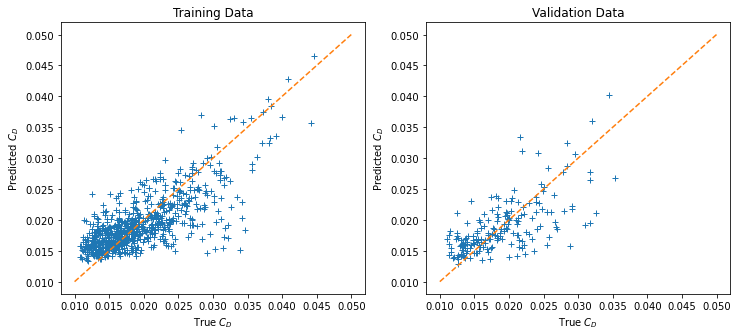

In [88]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)

y_pred = gp.predict(x_train)
y_train.values
#plt.plot(y_pred)
plt.plot(y_train.values, y_pred, '+')
plt.plot([0.01, 0.05], [0.01, 0.05], "--")

#plt.gca().set_xlim([0.008, 0.042])
#plt.gca().set_ylim([0.008, 0.042])
ax1 = plt.gca()
ax1.set_ylabel("Predicted $C_D$")
ax1.set_xlabel("True $C_D$")
ax1.set_title("Training Data")

plt.subplot(1, 2, 2)

y_pred = gp.predict(x_test)
y_test.values
#plt.plot(y_pred)
plt.plot(y_test.values, y_pred, '+', label="asd")
plt.plot([0.01, 0.05], [0.01, 0.05], "--")
#plt.plot(y_pred, 'o', c="r")
ax1.set_xlim(plt.gca().get_xlim())
ax1.set_ylim(plt.gca().get_ylim())
ax2 = plt.gca()
ax2.set_ylabel("Predicted $C_D$")
ax2.set_xlabel("True $C_D$")
ax2.set_title("Validation Data")

In [ ]:
plt.plot(Y[:,4][a], df_result["c_D"][a], "o")

In [ ]:
np.sum(df_result["rms_rho"] < -6)

In [ ]:
y_lb = np.min(Y[a])
y_ub = np.max(Y[a])
y_lb, y_ub

In [ ]:
X_ = np.linspace(y_lb, y_ub, 100)
#y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)

In [ ]:
#np.dot(U[0, :, np.newaxis], X_[np.newaxis, :])
X_ = np.zeros((r, 100))
X_[0] = np.linspace(y_lb, y_ub, 100)

In [ ]:
y_mean, y_std = gp.predict(X_.T, return_std=True)

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(X_[0], y_mean, 'k', lw=3, zorder=9)
plt.fill_between(X_[0], y_mean - y_std, y_mean + y_std, alpha=0.2, color='k')
y_samples = gp.sample_y(X_.T, 5)
plt.plot(X_[0], y_samples, lw=1)
plt.scatter(x_train[:, 0], y_train, c='r', s=50, zorder=10, edgecolors=(0, 0, 0), )
plt.scatter(x_test[:, 0], y_test, c='b', s=50, zorder=10, edgecolors=(0, 0, 0))

In [ ]:
np.dot(X_, np.ones((20,1)))

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)


kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.1),
           1.0 * ExpSineSquared(length_scale=1.0, periodicity=3.0,
                                length_scale_bounds=(0.1, 10.0),
                                periodicity_bounds=(1.0, 10.0)),
           ConstantKernel(0.1, (0.01, 10.0))
               * (DotProduct(sigma_0=1.0, sigma_0_bounds=(0.1, 10.0)) ** 2)  + WhiteKernel(),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0),
                        nu=1.5)]

for kernel in kernels:
    # Specify Gaussian Process
    gp = GaussianProcessRegressor(kernel=kernel)

    # Plot prior
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')
    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)

    # Generate data and fit GP
    rng = np.random.RandomState(4)
    X = rng.uniform(0, 5, 10)[:, np.newaxis]
    y = np.sin((X[:, 0] - 2.5) ** 2)
    gp.fit(X, y)

    # Plot posterior
    plt.subplot(2, 1, 2)
    X_ = np.linspace(0, 5, 100)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
    plt.fill_between(X_, y_mean - y_std, y_mean + y_std,
                     alpha=0.2, color='k')

    y_samples = gp.sample_y(X_[:, np.newaxis], 10)
    plt.plot(X_, y_samples, lw=1)
    plt.scatter(X[:, 0], y, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
    plt.xlim(0, 5)
    plt.ylim(-3, 3)
    plt.title("Posterior (kernel: %s)\n Log-Likelihood: %.3f"
              % (gp.kernel_, gp.log_marginal_likelihood(gp.kernel_.theta)),
              fontsize=12)
    plt.tight_layout()

plt.show()

In [ ]:
df_result["c_D"].argmin()

#### 

In [ ]:
df_result.loc[706]